In [1]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
#Reading the data files essentially making them into ONE 
df1 = pd.read_csv('dataset_1.txt', sep=',', header=None)
df2 = pd.read_csv('dataset_2.txt', sep=',', header=None)  
df3 = pd.read_csv('dataset_3.txt', sep=',', header=None)  
df4 = pd.read_csv('dataset_4.txt', sep=',', header=None)  
df5 = pd.read_csv('dataset_5.txt', sep=',', header=None)  
df6 = pd.read_csv('dataset_6.txt', sep=',', header=None)  
df7 = pd.read_csv('dataset_7.txt', sep=',', header=None)  
df8 = pd.read_csv('dataset_8.txt', sep=',', header=None)  
df9 = pd.read_csv('dataset_9.txt', sep=',', header=None)  
df10 = pd.read_csv('dataset_10.txt', sep=',', header=None)  
df11 = pd.read_csv('dataset_11.txt', sep=',', header=None)  
df12 = pd.read_csv('dataset_12.txt', sep=',', header=None)  
df13 = pd.read_csv('dataset_13.txt', sep=',', header=None)  
df14 = pd.read_csv('dataset_14.txt', sep=',', header=None)  
df15 = pd.read_csv('dataset_15.txt', sep=',', header=None)  
df16 = pd.read_csv('dataset_16.txt', sep=',', header=None)  
df17 = pd.read_csv('dataset_17.txt', sep=',', header=None)  
df18 = pd.read_csv('dataset_18.txt', sep=',', header=None)  
df19 = pd.read_csv('dataset_19.txt', sep=',', header=None)  

data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19])

In [3]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.092478,0.14400,-0.009739,231.24,42.410,181.190,-0.13840,-0.85828,0.101680,32.813,...,-6.607700,-15.092000,38.214,-0.90671,-0.436980,-0.52616,-91.394,33.158,4.2875,1
1,0.057310,0.16003,-0.009739,238.56,51.564,174.590,-0.15410,-0.86636,0.069517,46.727,...,-5.143100,-18.021000,37.482,-0.94272,-0.321320,-0.49881,-82.606,36.087,-1.5711,1
2,0.022143,0.18408,-0.038329,243.69,59.620,166.170,-0.15410,-0.89867,0.053434,57.346,...,-3.678400,-20.584000,37.116,-0.92271,-0.217220,-0.46756,-75.283,37.552,-5.9651,1
3,-0.001302,0.20412,-0.030160,246.62,65.112,156.290,-0.16981,-0.90675,0.049414,65.768,...,-0.749080,-23.514000,35.285,-0.89070,-0.136260,-0.45193,-69.424,37.552,-8.8945,1
4,-0.032562,0.20813,-0.026076,250.64,70.605,145.300,-0.16981,-0.90675,0.081579,69.063,...,-0.016749,-24.246000,33.088,-0.89870,-0.109270,-0.48709,-63.566,39.017,-10.3590,1
5,-0.067730,0.20813,-0.034244,253.57,75.731,134.320,-0.14625,-0.89867,0.133850,69.796,...,-1.481400,-23.147000,32.722,-0.90671,-0.089996,-0.53007,-57.707,37.552,-11.8240,1
6,-0.091175,0.20412,0.010682,253.21,80.491,121.870,-0.13840,-0.89059,0.157970,67.233,...,-0.016749,-19.852000,31.989,-0.90270,-0.116980,-0.55351,-53.313,36.087,-14.7530,1
7,-0.134160,0.20813,0.063777,252.48,84.519,110.150,-0.11484,-0.91887,0.238380,62.839,...,2.546400,-14.726000,30.891,-0.90671,-0.147830,-0.55351,-48.919,33.158,-14.7530,1
8,-0.165420,0.20412,0.108700,255.40,87.449,98.798,-0.11484,-0.93906,0.254460,54.051,...,5.475700,-7.402300,29.792,-0.87869,-0.140120,-0.58086,-44.525,30.229,-16.2180,1
9,-0.212310,0.19611,0.125040,263.09,88.913,88.179,-0.12269,-0.91887,0.290650,43.066,...,5.475700,-0.078928,29.792,-0.87869,-0.128550,-0.61603,-40.131,27.299,-17.6820,1


In [4]:
#visualize data before noise
def data_visulization():
    #all the 13 activities in range
    # Accelermeter Sensors: 0,1,2
    # Gyroscope sensors: 3,4,5
    
    for i in range(1,14):
        data_activity = data[data[24] == i].values
    
        plt.plot(data_activity[:, 0:3])
        plt.show()
    
    
        plt.plot(data_activity[:,3:6])
        plt.show()
    
    

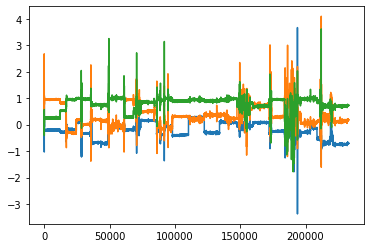

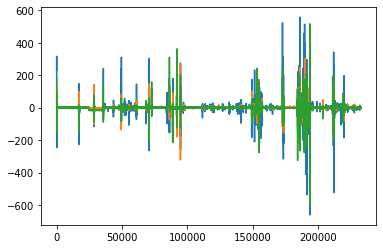

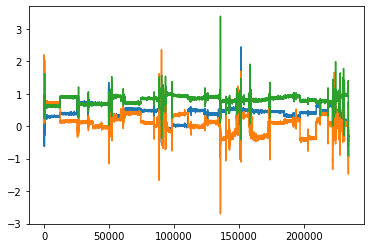

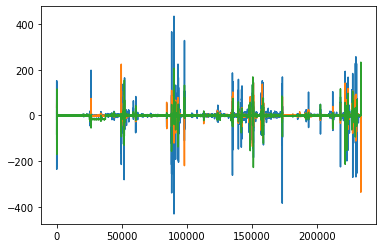

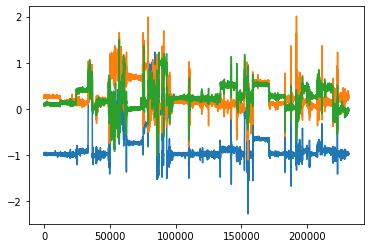

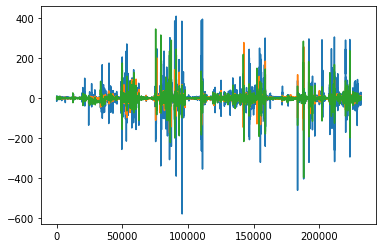

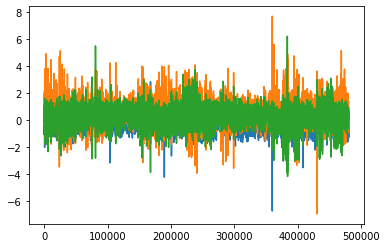

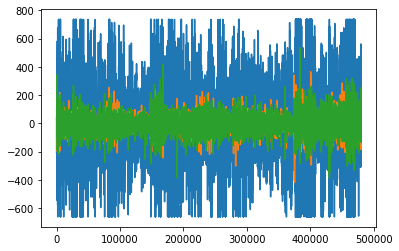

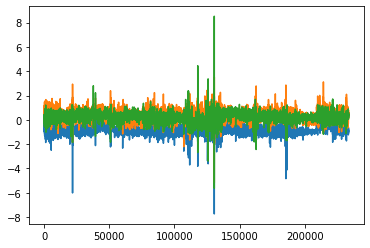

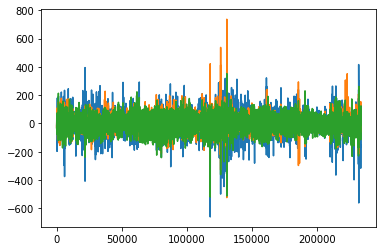

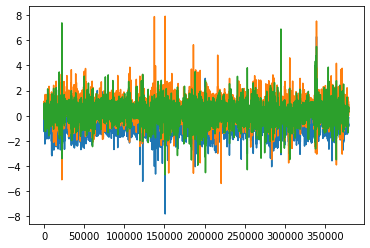

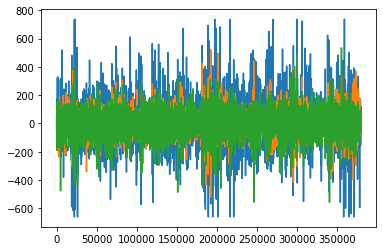

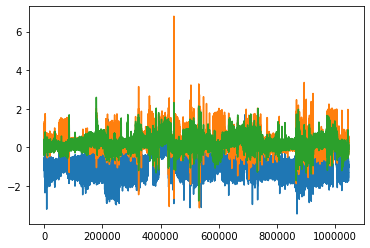

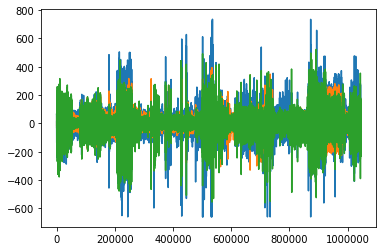

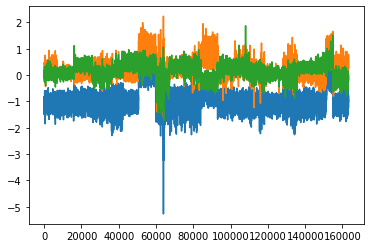

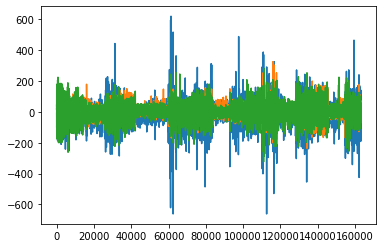

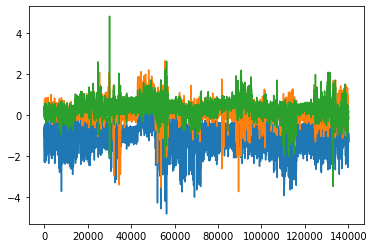

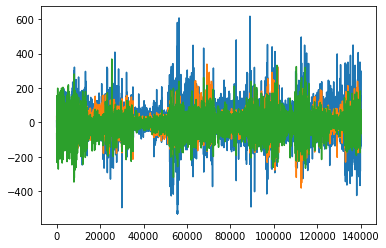

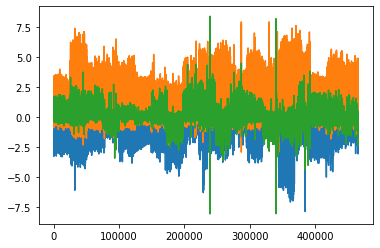

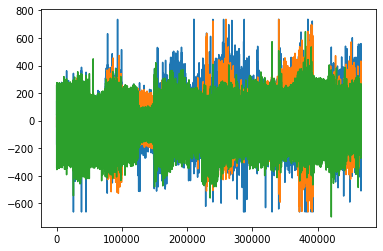

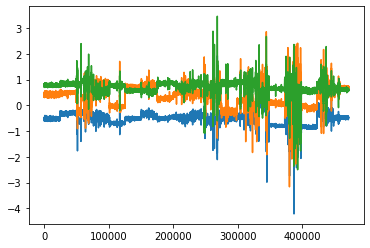

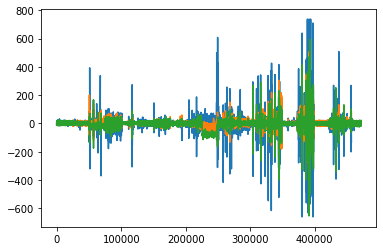

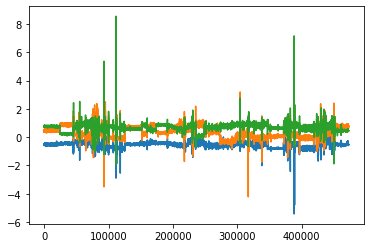

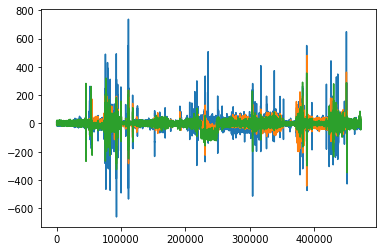

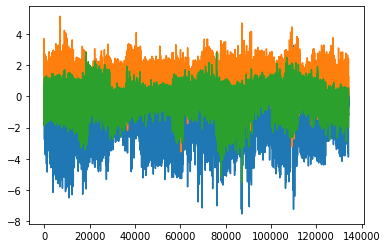

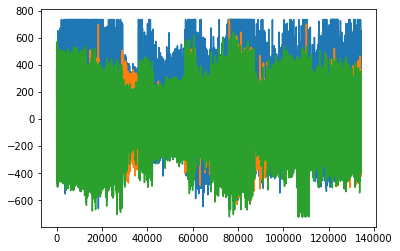

In [5]:
data_visulization()

In [6]:
def noise_removing():
    # Butterworth low-pass filter
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    for i in range(1,14):
        data_activity = data[data[24] == i].values
   
        for i in range(0,3):
            data_activity[:,i] = signal.lfilter(b, a, data_activity[:, i])
        plt.plot(data_activity[500:3000, 0:3])
        plt.show()
    
        for i in range(3,6):
            data_activity[:,i] = signal.lfilter(b, a, data_activity[:, i])
        plt.plot(data_activity[1000:1100, 3:6])
        plt.show()

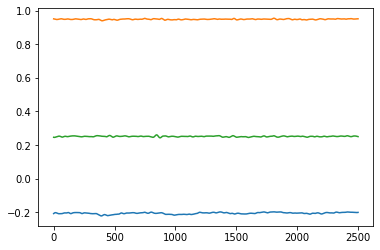

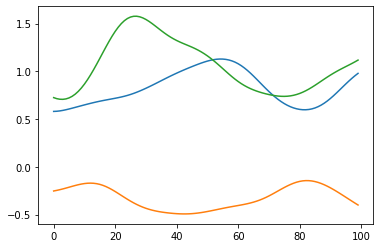

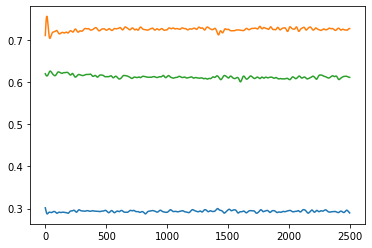

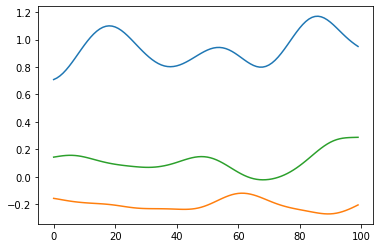

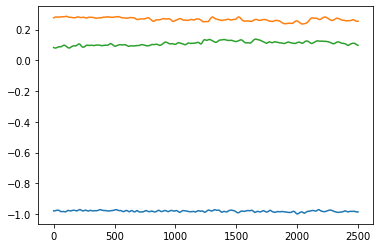

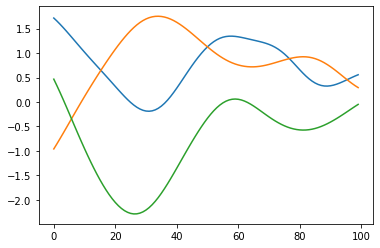

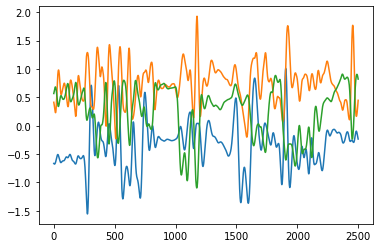

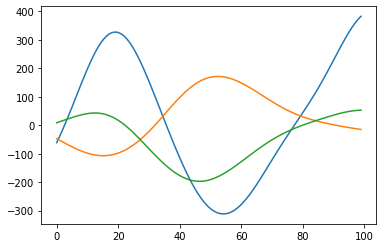

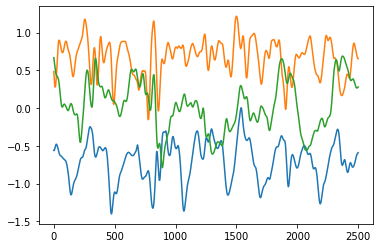

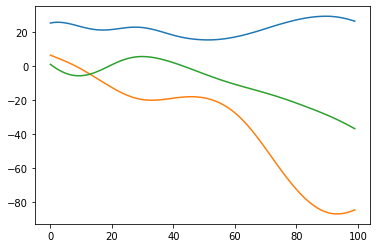

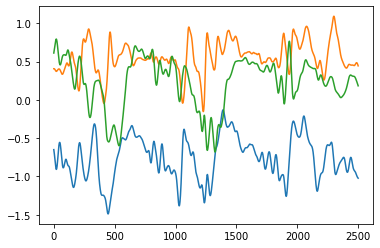

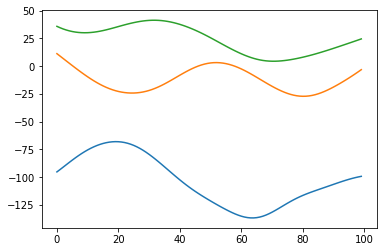

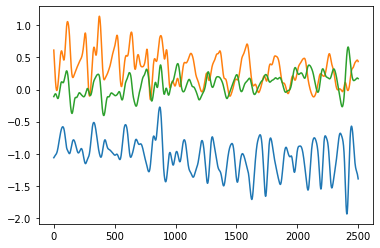

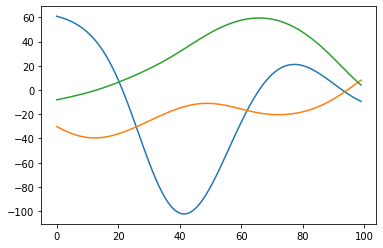

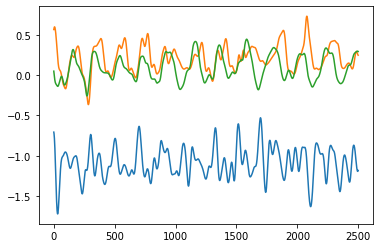

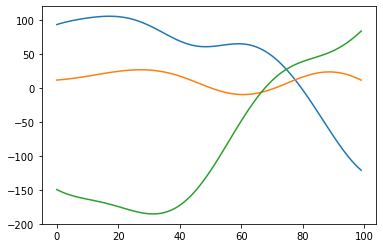

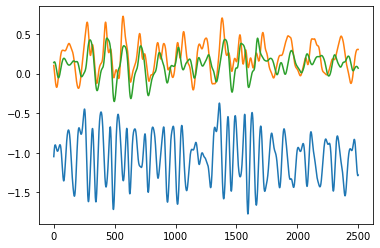

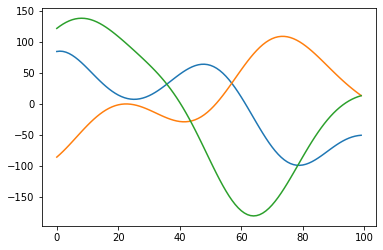

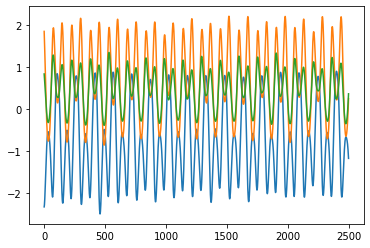

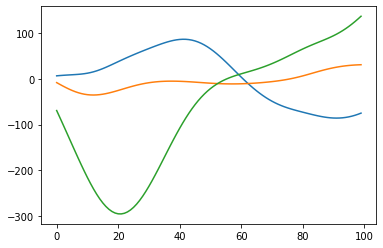

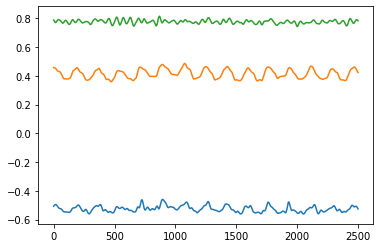

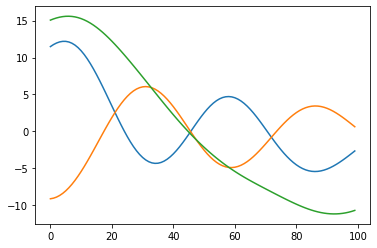

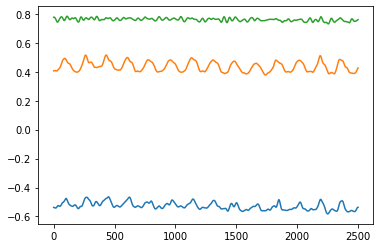

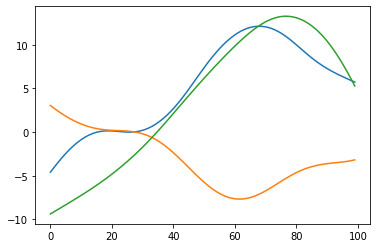

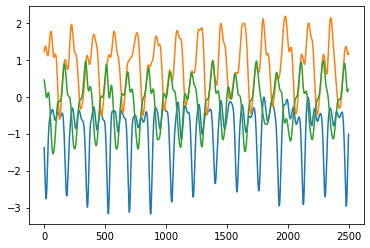

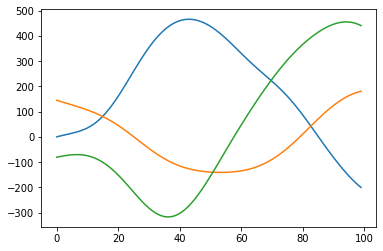

In [7]:
noise_removing()

In [8]:
def feature_engineering_example():
    training = np.empty(shape=(0, 10))
    testing = np.empty(shape=(0, 10))
    # deal with each dataset file
    for i in range(19):
        df = pd.read_csv('dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('deal with dataset ' + str(i + 1))
        for c in range(1, 14):
            activity_data = df[df[24] == c].values
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            datat_len = len(activity_data)
            training_len = math.floor(datat_len * 0.8)
            training_data = activity_data[:training_len, :]
            testing_data = activity_data[training_len:, :]

            # data segementation: for time series data, we need to segment the whole time series, and then extract features from each period of time
            # to represent the raw data. In this example code, we define each period of time contains 1000 data points. Each period of time contains 
            # different data points. You may consider overlap segmentation, which means consecutive two segmentation share a part of data points, to 
            # get more feature samples.
            training_sample_number = training_len // 1000 + 1
            testing_sample_number = (datat_len - training_len) // 1000 + 1

            for s in range(training_sample_number):
                if s < training_sample_number - 1:
                    sample_data = training_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = training_data[1000*s:, :]
                # in this example code, only three accelerometer data in wrist sensor is used to extract three simple features: min, max, and mean value in
                # a period of time. Finally we get 9 features and 1 label to construct feature dataset. You may consider all sensors' data and extract more

                feature_sample = []
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                training = np.concatenate((training, feature_sample), axis=0)
            
            for s in range(testing_sample_number):
                if s < training_sample_number - 1:
                    sample_data = testing_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = testing_data[1000*s:, :]

                feature_sample = []
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                testing = np.concatenate((testing, feature_sample), axis=0)

    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)

In [9]:
feature_engineering_example()

deal with dataset 1
deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19


In [10]:
def model_training_and_evaluation_example():
    df_training = pd.read_csv('training_data.csv', header=None)
    df_testing = pd.read_csv('testing_data.csv', header=None)

    y_train = df_training[9].values
    # Labels should start from 0 in sklearn
    y_train = y_train - 1
    df_training = df_training.drop([9], axis=1)
    X_train = df_training.values

    y_test = df_testing[9].values
    y_test = y_test - 1
    df_testing = df_testing.drop([9], axis=1)
    X_test = df_testing.values
    
    # Feature normalization for improving the performance of machine learning models. In this example code, 
    # StandardScaler is used to scale original feature to be centered around zero. You could try other normalization methods.
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Build KNN classifier, in this example code
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Evaluation. when we train a machine learning model on training set, we should evaluate its performance on testing set.
    # We could evaluate the model by different metrics. Firstly, we could calculate the classification accuracy. In this example
    # code, when n_neighbors is set to 4, the accuracy achieves 0.757.
    y_pred = knn.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    # We could use confusion matrix to view the classification for each activity.
    print(confusion_matrix(y_test, y_pred))
    
    # Another machine learning model: svm. In this example code, we use gridsearch to find the optimial classifier
    # It will take a long time to find the optimal classifier.
    # the accuracy for SVM classifier with default parameters is 0.71, 
    # which is worse than KNN. The reason may be parameters of svm classifier are not optimal.  
    # Another reason may be we only use 9 features and they are not enough to build a good svm classifier. 
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 100]},
                    {'kernel': ['linear'], 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]}]
    acc_scorer = make_scorer(accuracy_score)
    grid_obj  = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring=acc_scorer)
    grid_obj  = grid_obj .fit(X_train, y_train)
    clf = grid_obj.best_estimator_
    print('best clf:', clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    


In [11]:
model_training_and_evaluation_example()

Accuracy:  0.7504798464491362
[[ 43   3   0   0   0   1   0   0   0   0   7   3   0]
 [  3  54   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3  48   1   2   0   1   0   0   0   1   1   0]
 [  2   0   2  84   4   5   1   1   0   0   0   0   0]
 [  0   0   1   8  36   7   1   3   0   0   1   0   0]
 [  1   1   2  14  26  32   4   1   1   0   1   2   0]
 [  1   0   6   4   2   6 191   4   5   0   0   0   0]
 [  0   0   1   0   0   2  14  21   1   0   0   0   0]
 [  0   0   0   1   0   1   9   2  24   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0  96   0   0   0]
 [  0   0   1   3   2   7   2   0   0   0  58  27   0]
 [  0   0   1   1   0   0   0   0   0   0  39  59   0]
 [  0   0   0   1   0   0   1   0   0   0   0   0  36]]
best clf: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy:  0.71